# Daniyal Khan || 221A061 || TE-AIDS

## Importing libraries

In [ ]:
# Daniyal Khan || 221A061

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load and simulate data series

In [ ]:
# Daniyal Khan || 221A061

np.random.seed(42)
data_rng = pd.date_range(start='2020-01-01', end='2023-01-01', freq='ME')
data = np.cumsum (np.random.randn(len(data_rng)))
df= pd.DataFrame(data, index=data_rng, columns=['Value'])

# Check for stationary with ARIMA


In [ ]:
# Daniyal Khan || 221A061

def check_stationarity(timeseries):
   result = adfuller(timeseries)
   print("ADF Statistic:", result[0])
   print("p-value:", result[1])
   if result[1] < 0.05:
      print("The series is stationary.")
   else:
      print("The series is NOT stationary")

check_stationarity(df["Value"])



ADF Statistic: -0.24329544714070422
p-value: 0.9331602815879095
The series is NOT stationary


## Conclusion : Not stationary

# Arima parameters (p,d,q)

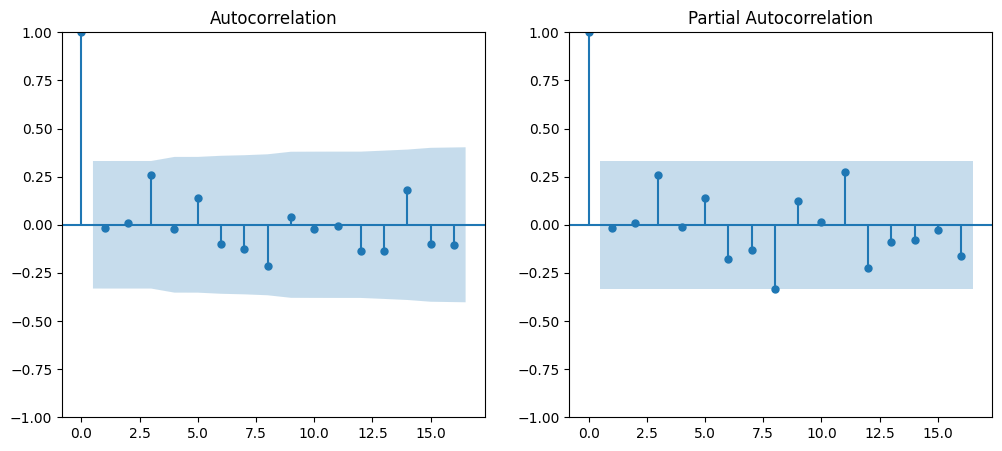

In [ ]:
# Daniyal Khan || 221A061

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_acf(df["Differenced"]. dropna(), ax=axes [0])
plot_pacf(df["Differenced"]. dropna (), ax=axes [1])
plt. show()

In [ ]:
# Daniyal Khan || 221A061

def check_stationarity(timeseries):
   result = adfuller(timeseries)
   print("ADF Statistic:", result[0])
   print("p-value:", result[1])
   if result[1] < 0.05:
      print("The series is stationary.")
   else:
      print("The series is NOT stationary")

check_stationarity(df["Value"])

ADF Statistic: -0.24329544714070422
p-value: 0.9331602815879095
The series is NOT stationary


# Now check for stationary

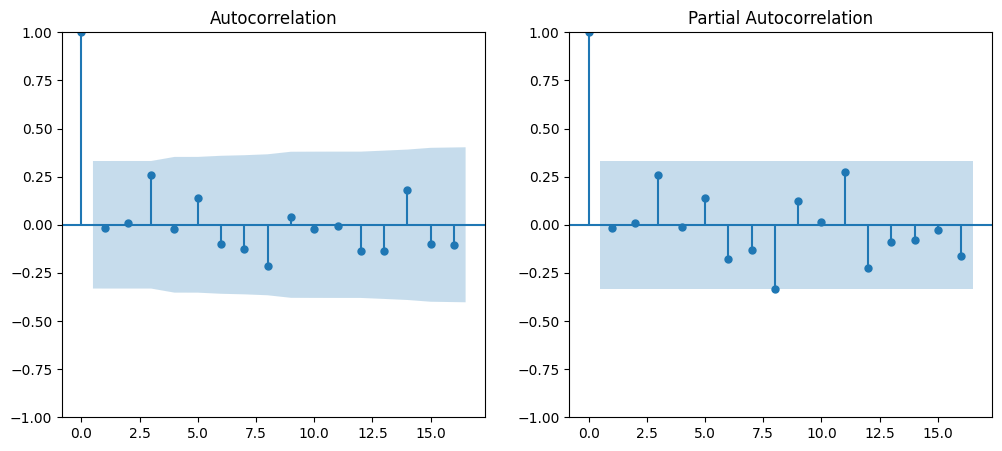

In [ ]:
# Daniyal Khan || 221A061

df["Differenced"] = df["Value"].diff().dropna() # Creating the 'Differenced' column

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_acf(df["Differenced"]. dropna(), ax=axes [0])
plot_pacf(df["Differenced"]. dropna (), ax=axes [1])
plt. show()

In [ ]:
# Daniyal Khan || 221A061

df["Differenced"] = df["Value"].diff().dropna() # Changed 'Value' to 'value'

check_stationarity(df["Differenced"].dropna())

ADF Statistic: -5.637067232815389
p-value: 1.0571250708886819e-06
The series is stationary.


# Now Fitting the model

In [ ]:
# Daniyal Khan || 221A061

p, d, q = 1, 1, 1
model = ARIMA(df["Value"], order=(p, d, q))
arima_result = model. fit()
print(arima_result. summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   36
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -47.388
Date:                Sat, 15 Mar 2025   AIC                            100.776
Time:                        01:55:43   BIC                            105.442
Sample:                    01-31-2020   HQIC                           102.386
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8380      0.492      1.703      0.089      -0.126       1.802
ma.L1         -0.7597      0.585     -1.299      0.194      -1.906       0.387
sigma2         0.8769      0.259      3.380      0.0

# Now forcast future values

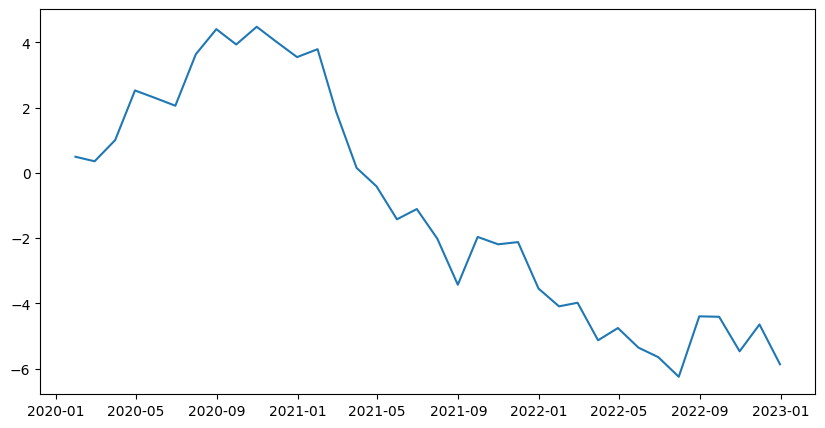

In [ ]:
# Daniyal Khan || 221A061

forecast_steps = 12  # Number of months to forecast
forecast = arima_result.forecast(steps=forecast_steps)

# Create a date range for the forecast
future_dates = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq="ME")[1:]
forecast_series = pd.Series(forecast, index=future_dates)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(df["Value"], label="Historical Data")


# Forecast for 1 year

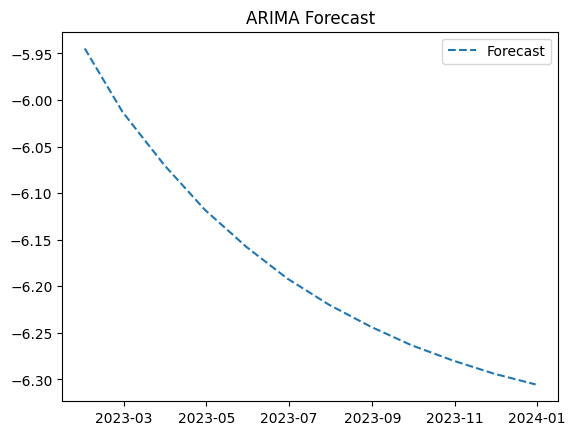

In [ ]:
# Daniyal Khan || 221A061

plt.plot(forecast_series, label="Forecast", linestyle="dashed")
plt.legend()
plt.title("ARIMA Forecast")
plt.show()


In [ ]:
# Daniyal Khan || 221A061

check_stationarity(df["Differenced"].dropna())

ADF Statistic: -5.637067232815389
p-value: 1.0571250708886819e-06
The series is stationary.


# Now evaluating the model

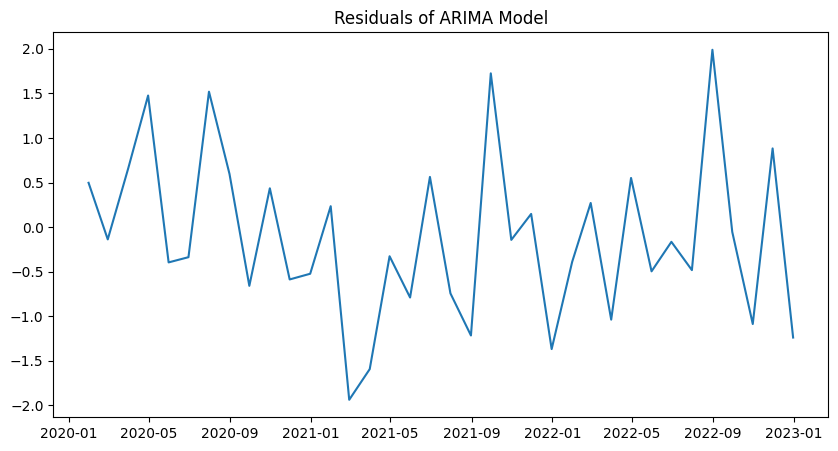

In [ ]:
# Daniyal Khan || 221A061

residuals = arima_result.resid
plt.figure(figsize=(10, 5))
plt.plot(residuals)
plt.title("Residuals of ARIMA Model")
plt.show()


# Calculating the mean square error

In [ ]:
# Daniyal Khan || 221A061

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(df["Value"].dropna(), arima_result.fittedvalues)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 0.86
